# Takeaway

37.4 percent of all 99 workers who participated in this experiment annotated more than one image.

Each image was submitted as a separate job.

In [1]:
import collections, math, os, sys
sys.path.insert(0, '../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import numpy as np
import pandas as pd

In [2]:
num_spots_list = np.arange(50, 250, 25)
cwd = os.getcwd()

In [22]:
d = collections.defaultdict(list)
for num_spots in num_spots_list:
    json_filepath = cwd+ '/annotations/' + 'snr10_' + str(num_spots) + '.json'
    img_filename = 'snr_10_numspots_' + str(num_spots) + '_spot_img.png'
    qa = QuantiusAnnotation(json_filepath, img_filename)
    anno_all = qa.df()
    worker_list = util.get_workers(anno_all)
    for worker in worker_list:
        d[worker].append(num_spots)

mult, total = 0, 0
for key in d:
    print(key, '\t', d[key])
    if len(d[key]) != 1:
        mult += 1
    total += 1
print('\n', 'proportion of workers annotated more than one img: ', round(float(mult)/total, 3))

A11MLD3OK8BEX3 	 [50, 75]
A1B5CZX73HH3XV 	 [50]
A1EOVMNNT8Q370 	 [50, 75, 225]
A1FWX3Q9MWS5N5 	 [50, 100, 125, 200]
A1GL98AM404FJW 	 [50, 75]
A224U5UHWVFYVV 	 [50]
A2DFNVS6LBVK7 	 [50]
A2FZE7CARM54IG 	 [50, 75, 100, 125, 150, 175, 225]
A2KFULED9WP0I0 	 [50, 75, 100, 125, 150, 175, 200, 225]
A2OA7QWMUKKYBS 	 [50]
A2SLKJXOB4S5JR 	 [50, 75, 100, 125, 150, 175, 200, 225]
A31BGOJ3K148YQ 	 [50, 175]
A331U863Q8H8DK 	 [50, 75, 100, 125, 175, 200, 225]
A33VLZ11ECF6R1 	 [50, 125]
A3F5JMI9OM22JR 	 [50, 75]
A3FW9NWR6TJ4M9 	 [50]
A3NMOHKHT2RJI 	 [50, 75, 100, 125, 150, 175, 200, 225]
A3SHFOPG16PGNX 	 [50, 75, 100, 125, 150, 175]
A3UOEPZXAGKCT3 	 [50]
AHED54NOS25RY 	 [50]
AOYPWVN6SETEU 	 [50, 75, 100, 125, 150, 175, 200, 225]
AQ7WOGUUSO0XV 	 [50]
ASY5AZCZEM04L 	 [50, 75, 100, 125, 150, 175, 200, 225]
ATF6Y3W0J2CMY 	 [50]
AV2IJRMZ0SW2R 	 [50]
A15NVIBF6Y29HK 	 [75, 200]
A1E0M58XMDH9MO 	 [75, 175]
A1OFOVU6TCQ2K3 	 [75, 100, 125, 150]
A3DN99QMIS1RJ5 	 [75]
A3IRQEJDDTCO3K 	 [75]
AAJ121M08S5KD 	 [75]
AEPR

Text(0.5,1,'Total number of unique workers = 99')

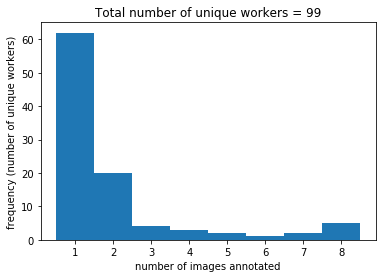

In [30]:
amounts = []
for key in d:
    amounts.append(len(d[key]))

import matplotlib.pyplot as plt
plt.hist(amounts, bins = np.arange(0.5, 9.5, 1))
plt.ylabel('frequency (number of unique workers)')
plt.xlabel('number of images annotated')
plt.title('Total number of unique workers = ' + str(len(d)))